### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Load Datasets

In [2]:
df_salary = pd.read_csv('salary_data.csv')

### Exploratory Data Analysis

In [3]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df_salary.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
print('Total Rows:', df_salary.shape[0])
print('Total Columns:', df_salary.shape[1])

Total Rows: 30
Total Columns: 2


### Check Missing Value

In [6]:
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Plotting

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

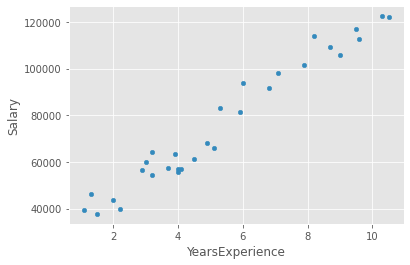

In [7]:
df_salary.plot.scatter(x='YearsExperience', y='Salary')

### Splitting the Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_data, test_data = train_test_split(df_salary, test_size=0.2, random_state=12)

In [10]:
print(f'Total train data rows : {train_data.shape[0]}')
print(f'Total test data rows : {test_data.shape[0]}')

Total train data rows : 24
Total test data rows : 6


### Prepare Data

In [19]:
# Train Data
train_label = train_data['Salary']
train_feature = train_data.drop(['Salary'], axis=1)

# Test Data
test_label = test_data['Salary']
test_feature = test_data.drop(['Salary'], axis=1)

### Training the Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr_model = LinearRegression()

In [23]:
# train model
lr_model.fit(X=train_feature, y=train_label)

LinearRegression()

### Testing the Model

In [24]:
accuracy_score = lr_model.score(X=test_feature, y=test_label)

In [27]:
print('Accuracy: {}'.format(accuracy_score * 100))

Accuracy: 94.29269163491423


In [28]:
salary_pred = lr_model.predict(test_feature)

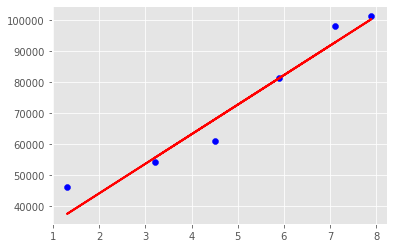

In [29]:
plt.scatter(test_data['YearsExperience'], test_data['Salary'], color='blue')
plt.plot(test_data['YearsExperience'], salary_pred, color='red', linewidth=2)
plt.show()

In [30]:
test_feature['YearsExperience']

7     3.2
22    7.9
18    5.9
14    4.5
1     1.3
21    7.1
Name: YearsExperience, dtype: float64

In [31]:
salary_pred

array([ 55675.5913984 , 100372.57413579,  81352.58148158,  68038.58662364,
        37606.59837691,  92764.5770741 ])

In [32]:
print('Coefficient: ', lr_model.coef_[0])
print('Intercept: ', lr_model.intercept_)

Coefficient:  9509.996327102475
Intercept:  25243.603151676223


### Linear Regression Formula

In [33]:
y = 9509.996327102475 * 3.2 + 25243.603151676223
y

55675.59139840415